In [1]:
import pandas as pd
import datetime as dt
import numpy as np

In [2]:
df1_OP = pd.read_excel('data.xlsx', sheet_name="Order Products")
df1_vendors = pd.read_excel('data.xlsx', sheet_name="Vendors")
df1_orders = pd.read_excel('data.xlsx', sheet_name="Orders")
df1_raiting = pd.read_excel('data.xlsx', sheet_name="Ratings")

df1_orders.head()

,id,created_at,Customer ID,Order Status,Cancel Reason,Vendor,SuperTypeID,Sub-Total,Total Discount,Discount Vendor Share,Voucher Value,product models,items
0,1,2021-01-01 04:04:18.000,101,Canceled,Customer Canceled,Store 1,12,302400,8400.0,0,0.0,4,4
1,2,2021-01-01 10:00:10.000,102,Successful,NaN,Store 2,12,899760,19560.0,0,0.0,1,1
2,3,2021-01-01 10:30:09.000,103,Successful,NaN,Store 3,12,149400,24900.0,37350,25000.0,1,1
3,4,2021-01-01 11:28:51.000,104,Successful,NaN,Store 4,12,214400,0.0,0,25000.0,2,2
4,5,2021-01-01 11:31:24.000,105,Successful,NaN,Store 5,12,1159200,25200.0,0,0.0,1,1


In [3]:
df1_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70531 entries, 0 to 70530
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     70531 non-null  int64  
 1   created_at             70531 non-null  object 
 2   Customer ID            70531 non-null  int64  
 3   Order Status           70531 non-null  object 
 4   Cancel Reason          3418 non-null   object 
 5   Vendor                 70531 non-null  object 
 6   SuperTypeID            70531 non-null  int64  
 7   Sub-Total              70531 non-null  int64  
 8   Total Discount         70531 non-null  float64
 9   Discount Vendor Share  70531 non-null  int64  
 10  Voucher Value          70531 non-null  float64
 11  product models         70531 non-null  int64  
 12  items                  70531 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 7.0+ MB


In [4]:
df1_OP['created_at']= pd.to_datetime(df1_OP['created_at'])
df1_OP['order_date'] = df1_OP['created_at'].dt.date
dfp = df1_OP.drop(["created_at"],axis=1)
dfp.head()

,Order ID,Customer ID,Vendor Name,SuperTypeID,product id,quantity,price,order_date
0,1,101,Store 21,12,10001,1,2350000,2021-02-03
1,2,102,Store 21,12,10002,1,104000,2021-05-03
2,3,103,Store 21,12,10003,1,216000,2021-03-16
3,4,104,Store 27,12,10004,1,66500,2021-03-13
4,5,105,Store 62,12,10004,1,66500,2021-03-22


In [5]:
df1_vendors['CreatedAt']= pd.to_datetime(df1_vendors['CreatedAt'])
df1_vendors['vendor_created'] = df1_vendors['CreatedAt'].dt.date
dfv = df1_vendors.drop(["CreatedAt"],axis=1)
dfv.head()

,Vendor Name,vendor_created
0,Store 1,2020-11-17
1,Store 2,2020-11-24
2,Store 3,2020-05-28
3,Store 4,2020-12-23
4,Store 5,2020-05-30


In [6]:
df1_orders['created_at']= pd.to_datetime(df1_orders['created_at'])
df1_orders['order_date'] = df1_orders['created_at'].dt.date
dfo = df1_orders.drop(["created_at"],axis=1)
dfo.head()

,id,Customer ID,Order Status,Cancel Reason,Vendor,SuperTypeID,Sub-Total,Total Discount,Discount Vendor Share,Voucher Value,product models,items,order_date
0,1,101,Canceled,Customer Canceled,Store 1,12,302400,8400.0,0,0.0,4,4,2021-01-01
1,2,102,Successful,NaN,Store 2,12,899760,19560.0,0,0.0,1,1,2021-01-01
2,3,103,Successful,NaN,Store 3,12,149400,24900.0,37350,25000.0,1,1,2021-01-01
3,4,104,Successful,NaN,Store 4,12,214400,0.0,0,25000.0,2,2,2021-01-01
4,5,105,Successful,NaN,Store 5,12,1159200,25200.0,0,0.0,1,1,2021-01-01


In [7]:
df1_raiting['created_at']= pd.to_datetime(df1_raiting['created_at'])
df1_raiting['order_date'] = df1_raiting['created_at'].dt.date
dfr = df1_raiting.drop(["created_at"],axis=1)
dfr.head()

,Order ID,Vendor,Product Models,Rating,order_date
0,1,Store 2,1,5,2021-01-01
1,2,Store 6,1,5,2021-01-01
2,3,Store 6,1,4,2021-01-01
3,4,Store 10,2,5,2021-01-01
4,5,Store 14,4,5,2021-01-01


In [8]:
dfo.head()

,id,Customer ID,Order Status,Cancel Reason,Vendor,SuperTypeID,Sub-Total,Total Discount,Discount Vendor Share,Voucher Value,product models,items,order_date
0,1,101,Canceled,Customer Canceled,Store 1,12,302400,8400.0,0,0.0,4,4,2021-01-01
1,2,102,Successful,NaN,Store 2,12,899760,19560.0,0,0.0,1,1,2021-01-01
2,3,103,Successful,NaN,Store 3,12,149400,24900.0,37350,25000.0,1,1,2021-01-01
3,4,104,Successful,NaN,Store 4,12,214400,0.0,0,25000.0,2,2,2021-01-01
4,5,105,Successful,NaN,Store 5,12,1159200,25200.0,0,0.0,1,1,2021-01-01


In [9]:
print(dfo["order_date"].min())
print(dfo["order_date"].max())

2021-01-01
2021-06-20


In [10]:
dfo['order_date'] = pd.to_datetime(dfo['order_date'], errors='coerce')
dfo['order_month'] =  dfo['order_date'].dt.month


dfo.head()


,id,Customer ID,Order Status,Cancel Reason,Vendor,SuperTypeID,Sub-Total,Total Discount,Discount Vendor Share,Voucher Value,product models,items,order_date,order_month
0,1,101,Canceled,Customer Canceled,Store 1,12,302400,8400.0,0,0.0,4,4,2021-01-01,1
1,2,102,Successful,NaN,Store 2,12,899760,19560.0,0,0.0,1,1,2021-01-01,1
2,3,103,Successful,NaN,Store 3,12,149400,24900.0,37350,25000.0,1,1,2021-01-01,1
3,4,104,Successful,NaN,Store 4,12,214400,0.0,0,25000.0,2,2,2021-01-01,1
4,5,105,Successful,NaN,Store 5,12,1159200,25200.0,0,0.0,1,1,2021-01-01,1


In [11]:
dfo.loc[dfo.order_month < 4 , 'which month'] = "month 1 - 3"
dfo.loc[dfo.order_month >= 4 , 'which month'] = "month 4 - 6"

dfo.head()

,id,Customer ID,Order Status,Cancel Reason,Vendor,SuperTypeID,Sub-Total,Total Discount,Discount Vendor Share,Voucher Value,product models,items,order_date,order_month,which month
0,1,101,Canceled,Customer Canceled,Store 1,12,302400,8400.0,0,0.0,4,4,2021-01-01,1,month 1 - 3
1,2,102,Successful,NaN,Store 2,12,899760,19560.0,0,0.0,1,1,2021-01-01,1,month 1 - 3
2,3,103,Successful,NaN,Store 3,12,149400,24900.0,37350,25000.0,1,1,2021-01-01,1,month 1 - 3
3,4,104,Successful,NaN,Store 4,12,214400,0.0,0,25000.0,2,2,2021-01-01,1,month 1 - 3
4,5,105,Successful,NaN,Store 5,12,1159200,25200.0,0,0.0,1,1,2021-01-01,1,month 1 - 3


In [12]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70531 entries, 0 to 70530
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     70531 non-null  int64         
 1   Customer ID            70531 non-null  int64         
 2   Order Status           70531 non-null  object        
 3   Cancel Reason          3418 non-null   object        
 4   Vendor                 70531 non-null  object        
 5   SuperTypeID            70531 non-null  int64         
 6   Sub-Total              70531 non-null  int64         
 7   Total Discount         70531 non-null  float64       
 8   Discount Vendor Share  70531 non-null  int64         
 9   Voucher Value          70531 non-null  float64       
 10  product models         70531 non-null  int64         
 11  items                  70531 non-null  int64         
 12  order_date             70531 non-null  datetime64[ns]
 13  o

In [13]:
dfo1 = dfo.groupby(["Vendor","which month","Order Status","SuperTypeID"]).agg({'id':'count', 'Customer ID' :'nunique','Sub-Total':'sum','Total Discount':'sum','Discount Vendor Share':'sum','Voucher Value':'sum','product models':'sum','items':'sum'}).reset_index()

dfo1.rename(columns={'Vendor': 'Vendor Name',
                         'id': 'orders',
                         'Customer ID': 'nunique_customers'}, inplace=True)
dfo1

,Vendor Name,which month,Order Status,SuperTypeID,orders,nunique_customers,Sub-Total,Total Discount,Discount Vendor Share,Voucher Value,product models,items
0,Store 1,month 1 - 3,Canceled,12,45,44,11588174,321821.5,15000,0.00,97,122
1,Store 1,month 1 - 3,Successful,12,478,444,111299086,3232618.5,408815,5558754.00,1324,1559
2,Store 1,month 4 - 6,Canceled,12,13,13,3073348,109093.0,80850,0.00,26,57
3,Store 1,month 4 - 6,Successful,12,273,260,61332142,1531649.5,1269700,1655000.00,847,1005
4,Store 10,month 1 - 3,Canceled,12,132,125,35788678,432701.0,865402,0.00,380,458
...,...,...,...,...,...,...,...,...,...,...,...,...
1018,Store 98,month 4 - 6,Canceled,13,2,2,657400,28150.0,17800,0.00,7,7
1019,Store 98,month 4 - 6,Successful,13,25,24,4914120,340170.0,334400,138263.75,150,159
1020,Store 99,month 1 - 3,Canceled,12,2,2,4000,0.0,0,0.00,2,2
1021,Store 99,month 1 - 3,Successful,12,6,1,12000,0.0,0,0.00,6,6


In [14]:
data = pd.merge(dfo1, dfv, how='outer', on=['Vendor Name'])
data.head()

,Vendor Name,which month,Order Status,SuperTypeID,orders,nunique_customers,Sub-Total,Total Discount,Discount Vendor Share,Voucher Value,product models,items,vendor_created
0,Store 1,month 1 - 3,Canceled,12,45,44,11588174,321821.5,15000,0.0,97,122,2020-11-17
1,Store 1,month 1 - 3,Successful,12,478,444,111299086,3232618.5,408815,5558754.0,1324,1559,2020-11-17
2,Store 1,month 4 - 6,Canceled,12,13,13,3073348,109093.0,80850,0.0,26,57,2020-11-17
3,Store 1,month 4 - 6,Successful,12,273,260,61332142,1531649.5,1269700,1655000.0,847,1005,2020-11-17
4,Store 10,month 1 - 3,Canceled,12,132,125,35788678,432701.0,865402,0.0,380,458,2020-04-15


In [15]:
print(data["vendor_created"].min())
print(data["vendor_created"].max())

2020-04-13
2021-06-02


In [16]:
dfo.head()

,id,Customer ID,Order Status,Cancel Reason,Vendor,SuperTypeID,Sub-Total,Total Discount,Discount Vendor Share,Voucher Value,product models,items,order_date,order_month,which month
0,1,101,Canceled,Customer Canceled,Store 1,12,302400,8400.0,0,0.0,4,4,2021-01-01,1,month 1 - 3
1,2,102,Successful,NaN,Store 2,12,899760,19560.0,0,0.0,1,1,2021-01-01,1,month 1 - 3
2,3,103,Successful,NaN,Store 3,12,149400,24900.0,37350,25000.0,1,1,2021-01-01,1,month 1 - 3
3,4,104,Successful,NaN,Store 4,12,214400,0.0,0,25000.0,2,2,2021-01-01,1,month 1 - 3
4,5,105,Successful,NaN,Store 5,12,1159200,25200.0,0,0.0,1,1,2021-01-01,1,month 1 - 3


In [17]:
dfo['order_date'] = pd.to_datetime(dfo['order_date'], errors='coerce')
dfo['order_week'] =  dfo['order_date'].dt.week


dfo.head()


<ipython-input-17-dd8040f9b775>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dfo['order_week'] =  dfo['order_date'].dt.week


,id,Customer ID,Order Status,Cancel Reason,Vendor,SuperTypeID,Sub-Total,Total Discount,Discount Vendor Share,Voucher Value,product models,items,order_date,order_month,which month,order_week
0,1,101,Canceled,Customer Canceled,Store 1,12,302400,8400.0,0,0.0,4,4,2021-01-01,1,month 1 - 3,53
1,2,102,Successful,NaN,Store 2,12,899760,19560.0,0,0.0,1,1,2021-01-01,1,month 1 - 3,53
2,3,103,Successful,NaN,Store 3,12,149400,24900.0,37350,25000.0,1,1,2021-01-01,1,month 1 - 3,53
3,4,104,Successful,NaN,Store 4,12,214400,0.0,0,25000.0,2,2,2021-01-01,1,month 1 - 3,53
4,5,105,Successful,NaN,Store 5,12,1159200,25200.0,0,0.0,1,1,2021-01-01,1,month 1 - 3,53


In [18]:
df_test = dfo.groupby(["Vendor","order_week"]).agg({'order_date':'nunique'}).reset_index()
df_test

,Vendor,order_week,order_date
0,Store 1,1,6
1,Store 1,2,5
2,Store 1,3,6
3,Store 1,4,5
4,Store 1,5,6
...,...,...,...
3413,Store 99,7,1
3414,Store 99,8,1
3415,Store 99,9,1
3416,Store 99,10,1


In [19]:
df_test2 = df_test.groupby(["Vendor"]).agg({'order_date':'mean'}).round().reset_index()
df_test2

,Vendor,order_date
0,Store 1,5.0
1,Store 10,6.0
2,Store 100,4.0
3,Store 101,6.0
4,Store 102,1.0
...,...,...
434,Store 95,2.0
435,Store 96,2.0
436,Store 97,1.0
437,Store 98,2.0


In [20]:
df_test2.rename(columns={'order_date': 'ave_active_per_week','Vendor':'Vendor Name'}, inplace=True)
df_test2.head()

,Vendor Name,ave_active_per_week
0,Store 1,5.0
1,Store 10,6.0
2,Store 100,4.0
3,Store 101,6.0
4,Store 102,1.0


In [21]:
data1 = pd.merge(data, df_test2, how='outer', on=['Vendor Name'])
data1.head()

,Vendor Name,which month,Order Status,SuperTypeID,orders,nunique_customers,Sub-Total,Total Discount,Discount Vendor Share,Voucher Value,product models,items,vendor_created,ave_active_per_week
0,Store 1,month 1 - 3,Canceled,12,45,44,11588174,321821.5,15000,0.0,97,122,2020-11-17,5.0
1,Store 1,month 1 - 3,Successful,12,478,444,111299086,3232618.5,408815,5558754.0,1324,1559,2020-11-17,5.0
2,Store 1,month 4 - 6,Canceled,12,13,13,3073348,109093.0,80850,0.0,26,57,2020-11-17,5.0
3,Store 1,month 4 - 6,Successful,12,273,260,61332142,1531649.5,1269700,1655000.0,847,1005,2020-11-17,5.0
4,Store 10,month 1 - 3,Canceled,12,132,125,35788678,432701.0,865402,0.0,380,458,2020-04-15,6.0


In [22]:
data1["basket_value"] = (data1["Sub-Total"] / data1["orders"]).round()
data1["ave_discount_t"] = (data1["Total Discount"] / data1["orders"]).round()
data1["ave_discount_v"] = (data1["Discount Vendor Share"] / data1["orders"]).round()


data1["ave_voucher"] = (data1["Voucher Value"] / data1["orders"]).round()
data1["ave_model"] = (data1["product models"] / data1["orders"]).round()
data1["ave_items"] = (data1["items"] / data1["orders"]).round()

data2 = data1.drop(["Sub-Total","Total Discount","Discount Vendor Share","Voucher Value","product models","items"],axis=1)
data2.head()

,Vendor Name,which month,Order Status,SuperTypeID,orders,nunique_customers,vendor_created,ave_active_per_week,basket_value,ave_discount_t,ave_discount_v,ave_voucher,ave_model,ave_items
0,Store 1,month 1 - 3,Canceled,12,45,44,2020-11-17,5.0,257515.0,7152.0,333.0,0.0,2.0,3.0
1,Store 1,month 1 - 3,Successful,12,478,444,2020-11-17,5.0,232843.0,6763.0,855.0,11629.0,3.0,3.0
2,Store 1,month 4 - 6,Canceled,12,13,13,2020-11-17,5.0,236411.0,8392.0,6219.0,0.0,2.0,4.0
3,Store 1,month 4 - 6,Successful,12,273,260,2020-11-17,5.0,224660.0,5610.0,4651.0,6062.0,3.0,4.0
4,Store 10,month 1 - 3,Canceled,12,132,125,2020-04-15,6.0,271126.0,3278.0,6556.0,0.0,3.0,3.0


In [23]:
data2[data2["which month"] == "month 1 - 3"]["orders"].sum()

32086

In [24]:
data2.loc[data2["which month"] == "month 1 - 3" , 'all order'] = 32068
data2.loc[data2["which month"] != "month 1 - 3" , 'all order'] = 38445

data2.head()

,Vendor Name,which month,Order Status,SuperTypeID,orders,nunique_customers,vendor_created,ave_active_per_week,basket_value,ave_discount_t,ave_discount_v,ave_voucher,ave_model,ave_items,all order
0,Store 1,month 1 - 3,Canceled,12,45,44,2020-11-17,5.0,257515.0,7152.0,333.0,0.0,2.0,3.0,32068.0
1,Store 1,month 1 - 3,Successful,12,478,444,2020-11-17,5.0,232843.0,6763.0,855.0,11629.0,3.0,3.0,32068.0
2,Store 1,month 4 - 6,Canceled,12,13,13,2020-11-17,5.0,236411.0,8392.0,6219.0,0.0,2.0,4.0,38445.0
3,Store 1,month 4 - 6,Successful,12,273,260,2020-11-17,5.0,224660.0,5610.0,4651.0,6062.0,3.0,4.0,38445.0
4,Store 10,month 1 - 3,Canceled,12,132,125,2020-04-15,6.0,271126.0,3278.0,6556.0,0.0,3.0,3.0,32068.0


In [25]:
df_test3 = data2.groupby(["Vendor Name","which month"]).agg({'orders':'sum'}).reset_index()

df_test3.loc[df_test3["which month"] == "month 1 - 3" , 'all order'] = 32068
df_test3.loc[df_test3["which month"] != "month 1 - 3" , 'all order'] = 38445

df_test3["sales_share"] = ((df_test3["orders"] / df_test3["all order"])*100).round()

df_test4 = df_test3.drop(["orders","all order"],axis=1)
df_test4.head()

,Vendor Name,which month,sales_share
0,Store 1,month 1 - 3,2.0
1,Store 1,month 4 - 6,1.0
2,Store 10,month 1 - 3,2.0
3,Store 10,month 4 - 6,2.0
4,Store 100,month 1 - 3,1.0


In [26]:
data2.shape

(1023, 15)

In [27]:
data3 = pd.merge(data2, df_test4, how='outer', on=['Vendor Name','which month'])
data4 = data3.drop(["all order"],axis=1)
data4.head()

,Vendor Name,which month,Order Status,SuperTypeID,orders,nunique_customers,vendor_created,ave_active_per_week,basket_value,ave_discount_t,ave_discount_v,ave_voucher,ave_model,ave_items,sales_share
0,Store 1,month 1 - 3,Canceled,12,45,44,2020-11-17,5.0,257515.0,7152.0,333.0,0.0,2.0,3.0,2.0
1,Store 1,month 1 - 3,Successful,12,478,444,2020-11-17,5.0,232843.0,6763.0,855.0,11629.0,3.0,3.0,2.0
2,Store 1,month 4 - 6,Canceled,12,13,13,2020-11-17,5.0,236411.0,8392.0,6219.0,0.0,2.0,4.0,1.0
3,Store 1,month 4 - 6,Successful,12,273,260,2020-11-17,5.0,224660.0,5610.0,4651.0,6062.0,3.0,4.0,1.0
4,Store 10,month 1 - 3,Canceled,12,132,125,2020-04-15,6.0,271126.0,3278.0,6556.0,0.0,3.0,3.0,2.0


In [28]:
dfp.head()

,Order ID,Customer ID,Vendor Name,SuperTypeID,product id,quantity,price,order_date
0,1,101,Store 21,12,10001,1,2350000,2021-02-03
1,2,102,Store 21,12,10002,1,104000,2021-05-03
2,3,103,Store 21,12,10003,1,216000,2021-03-16
3,4,104,Store 27,12,10004,1,66500,2021-03-13
4,5,105,Store 62,12,10004,1,66500,2021-03-22


In [29]:
dfp1 = dfp.groupby(["Vendor Name"]).agg({'product id':'nunique'})
dfp1.rename(columns={'product id': 'product variety'}, inplace=True)
dfp1

,product variety
Vendor Name,
Store 1,777
Store 10,1710
Store 100,254
Store 101,157
Store 102,45
...,...
Store 95,4
Store 96,70
Store 97,6


In [30]:
data5 = pd.merge(data4, dfp1, how='outer', on=['Vendor Name'])
data5.head()

,Vendor Name,which month,Order Status,SuperTypeID,orders,nunique_customers,vendor_created,ave_active_per_week,basket_value,ave_discount_t,ave_discount_v,ave_voucher,ave_model,ave_items,sales_share,product variety
0,Store 1,month 1 - 3,Canceled,12,45,44,2020-11-17,5.0,257515.0,7152.0,333.0,0.0,2.0,3.0,2.0,777.0
1,Store 1,month 1 - 3,Successful,12,478,444,2020-11-17,5.0,232843.0,6763.0,855.0,11629.0,3.0,3.0,2.0,777.0
2,Store 1,month 4 - 6,Canceled,12,13,13,2020-11-17,5.0,236411.0,8392.0,6219.0,0.0,2.0,4.0,1.0,777.0
3,Store 1,month 4 - 6,Successful,12,273,260,2020-11-17,5.0,224660.0,5610.0,4651.0,6062.0,3.0,4.0,1.0,777.0
4,Store 10,month 1 - 3,Canceled,12,132,125,2020-04-15,6.0,271126.0,3278.0,6556.0,0.0,3.0,3.0,2.0,1710.0


In [31]:
dfr.head()

,Order ID,Vendor,Product Models,Rating,order_date
0,1,Store 2,1,5,2021-01-01
1,2,Store 6,1,5,2021-01-01
2,3,Store 6,1,4,2021-01-01
3,4,Store 10,2,5,2021-01-01
4,5,Store 14,4,5,2021-01-01


In [32]:
dfr1 = dfr.groupby(["Vendor"]).agg({'Rating':'mean'}).round().reset_index()

dfr1.rename(columns={'Vendor': 'Vendor Name'}, inplace=True)

dfr1


,Vendor Name,Rating
0,Store 1,4.0
1,Store 10,4.0
2,Store 100,4.0
3,Store 101,5.0
4,Store 102,5.0
...,...,...
276,Store 95,5.0
277,Store 96,4.0
278,Store 97,4.0
279,Store 98,5.0


In [33]:
data6 = pd.merge(data5, dfr1, how='outer', on=['Vendor Name'])
data6.head()

,Vendor Name,which month,Order Status,SuperTypeID,orders,nunique_customers,vendor_created,ave_active_per_week,basket_value,ave_discount_t,ave_discount_v,ave_voucher,ave_model,ave_items,sales_share,product variety,Rating
0,Store 1,month 1 - 3,Canceled,12,45,44,2020-11-17,5.0,257515.0,7152.0,333.0,0.0,2.0,3.0,2.0,777.0,4.0
1,Store 1,month 1 - 3,Successful,12,478,444,2020-11-17,5.0,232843.0,6763.0,855.0,11629.0,3.0,3.0,2.0,777.0,4.0
2,Store 1,month 4 - 6,Canceled,12,13,13,2020-11-17,5.0,236411.0,8392.0,6219.0,0.0,2.0,4.0,1.0,777.0,4.0
3,Store 1,month 4 - 6,Successful,12,273,260,2020-11-17,5.0,224660.0,5610.0,4651.0,6062.0,3.0,4.0,1.0,777.0,4.0
4,Store 10,month 1 - 3,Canceled,12,132,125,2020-04-15,6.0,271126.0,3278.0,6556.0,0.0,3.0,3.0,2.0,1710.0,4.0


In [34]:
#data6.to_excel(r'C:\Users\bahare\Desktop\snappshop\final.xlsx', index = True, header=True)

In [35]:
data7 = data6.groupby(["Vendor Name","which month"]).agg({'orders':'sum'}).reset_index()
data7.rename(columns={'orders': 'all order'}, inplace=True)

data7

,Vendor Name,which month,all order
0,Store 1,month 1 - 3,523
1,Store 1,month 4 - 6,286
2,Store 10,month 1 - 3,782
3,Store 10,month 4 - 6,839
4,Store 100,month 1 - 3,196
...,...,...,...
612,Store 97,month 4 - 6,1
613,Store 98,month 1 - 3,17
614,Store 98,month 4 - 6,27
615,Store 99,month 1 - 3,8


In [36]:
data9 = pd.merge(data6,data7, how='outer', on=['Vendor Name','which month'])
data9.head()

,Vendor Name,which month,Order Status,SuperTypeID,orders,nunique_customers,vendor_created,ave_active_per_week,basket_value,ave_discount_t,ave_discount_v,ave_voucher,ave_model,ave_items,sales_share,product variety,Rating,all order
0,Store 1,month 1 - 3,Canceled,12,45,44,2020-11-17,5.0,257515.0,7152.0,333.0,0.0,2.0,3.0,2.0,777.0,4.0,523
1,Store 1,month 1 - 3,Successful,12,478,444,2020-11-17,5.0,232843.0,6763.0,855.0,11629.0,3.0,3.0,2.0,777.0,4.0,523
2,Store 1,month 4 - 6,Canceled,12,13,13,2020-11-17,5.0,236411.0,8392.0,6219.0,0.0,2.0,4.0,1.0,777.0,4.0,286
3,Store 1,month 4 - 6,Successful,12,273,260,2020-11-17,5.0,224660.0,5610.0,4651.0,6062.0,3.0,4.0,1.0,777.0,4.0,286
4,Store 10,month 1 - 3,Canceled,12,132,125,2020-04-15,6.0,271126.0,3278.0,6556.0,0.0,3.0,3.0,2.0,1710.0,4.0,782


In [37]:
data9["rate"] = ((data9["orders"] / data9["all order"])*100).round()
data9

,Vendor Name,which month,Order Status,SuperTypeID,orders,nunique_customers,vendor_created,ave_active_per_week,basket_value,ave_discount_t,ave_discount_v,ave_voucher,ave_model,ave_items,sales_share,product variety,Rating,all order,rate
0,Store 1,month 1 - 3,Canceled,12,45,44,2020-11-17,5.0,257515.0,7152.0,333.0,0.0,2.0,3.0,2.0,777.0,4.0,523,9.0
1,Store 1,month 1 - 3,Successful,12,478,444,2020-11-17,5.0,232843.0,6763.0,855.0,11629.0,3.0,3.0,2.0,777.0,4.0,523,91.0
2,Store 1,month 4 - 6,Canceled,12,13,13,2020-11-17,5.0,236411.0,8392.0,6219.0,0.0,2.0,4.0,1.0,777.0,4.0,286,5.0
3,Store 1,month 4 - 6,Successful,12,273,260,2020-11-17,5.0,224660.0,5610.0,4651.0,6062.0,3.0,4.0,1.0,777.0,4.0,286,95.0
4,Store 10,month 1 - 3,Canceled,12,132,125,2020-04-15,6.0,271126.0,3278.0,6556.0,0.0,3.0,3.0,2.0,1710.0,4.0,782,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,Store 98,month 4 - 6,Canceled,13,2,2,2020-12-22,2.0,328700.0,14075.0,8900.0,0.0,4.0,4.0,0.0,173.0,5.0,27,7.0
1019,Store 98,month 4 - 6,Successful,13,25,24,2020-12-22,2.0,196565.0,13607.0,13376.0,5531.0,6.0,6.0,0.0,173.0,5.0,27,93.0
1020,Store 99,month 1 - 3,Canceled,12,2,2,2020-10-10,1.0,2000.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,4.0,8,25.0
1021,Store 99,month 1 - 3,Successful,12,6,1,2020-10-10,1.0,2000.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,4.0,8,75.0


# Scoring

In [38]:
data10 = data6.groupby(["Vendor Name"]).agg({'orders':'sum'}).reset_index()
data10.rename(columns={'orders': 'all order'}, inplace=True)

data10

,Vendor Name,all order
0,Store 1,809
1,Store 10,1621
2,Store 100,274
3,Store 101,1459
4,Store 102,19
...,...,...
434,Store 95,16
435,Store 96,82
436,Store 97,6
437,Store 98,44


<AxesSubplot:>

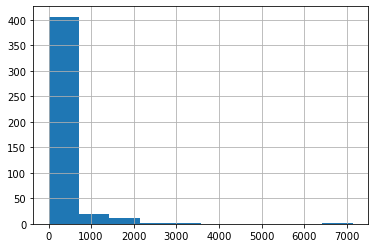

In [39]:
data10["all order"].hist()

In [40]:
print(data10["all order"].min())
print("10th percentile of arr : ",
       np.percentile(data10["all order"], 10))
print("20th percentile of arr : ",
       np.percentile(data10["all order"], 20))
print("30th percentile of arr : ",
       np.percentile(data10["all order"], 30))
print("40th percentile of arr : ", 
       np.percentile(data10["all order"], 40))
print("50th percentile of arr : ",
       np.percentile(data10["all order"], 50))
print("60th percentile of arr : ",
       np.percentile(data10["all order"], 60))
print("70th percentile of arr : ",
       np.percentile(data10["all order"], 70))
print("80th percentile of arr : ", 
       np.percentile(data10["all order"], 80))
print("90th percentile of arr : ",
       np.percentile(data10["all order"], 90))
print("10th percentile of arr : ",
       np.percentile(data10["all order"], 100))

1
10th percentile of arr :  1.0
20th percentile of arr :  3.0
30th percentile of arr :  5.0
40th percentile of arr :  8.0
50th percentile of arr :  13.0
60th percentile of arr :  23.0
70th percentile of arr :  43.599999999999966
80th percentile of arr :  106.60000000000014
90th percentile of arr :  368.99999999999983
10th percentile of arr :  7143.0


In [42]:
data10.head()

,Vendor Name,all order
0,Store 1,809
1,Store 10,1621
2,Store 100,274
3,Store 101,1459
4,Store 102,19


In [43]:
data9.shape

(1023, 19)

In [44]:
data11 = data10.copy()

In [46]:
data11.head()

,Vendor Name,all order
0,Store 1,809
1,Store 10,1621
2,Store 100,274
3,Store 101,1459
4,Store 102,19


In [47]:
data11["allorder"] = data11["all order"].copy()

In [50]:
data11.loc[data11.allorder <= 10 , 'Score_complete_order'] = "5"
data11.loc[(data11.allorder <= 30) & (data11.allorder > 10) , 'Score_complete_order'] = "10"
data11.loc[(data11.allorder <= 50) & (data11.allorder > 30) , 'Score_complete_order'] = "15"
data11.loc[ (data11.allorder > 50) , 'Score_complete_order'] = "20"
data11

,Vendor Name,all order,allorder,Score_complete_order
0,Store 1,809,809,20
1,Store 10,1621,1621,20
2,Store 100,274,274,20
3,Store 101,1459,1459,20
4,Store 102,19,19,10
...,...,...,...,...
434,Store 95,16,16,10
435,Store 96,82,82,20
436,Store 97,6,6,5
437,Store 98,44,44,15


In [51]:
data11.to_excel(r'C:\Users\bahare\Desktop\snappshop\score.xlsx', index = True, header=True)

# 2

In [52]:
data9.head()

,Vendor Name,which month,Order Status,SuperTypeID,orders,nunique_customers,vendor_created,ave_active_per_week,basket_value,ave_discount_t,ave_discount_v,ave_voucher,ave_model,ave_items,sales_share,product variety,Rating,all order,rate
0,Store 1,month 1 - 3,Canceled,12,45,44,2020-11-17,5.0,257515.0,7152.0,333.0,0.0,2.0,3.0,2.0,777.0,4.0,523,9.0
1,Store 1,month 1 - 3,Successful,12,478,444,2020-11-17,5.0,232843.0,6763.0,855.0,11629.0,3.0,3.0,2.0,777.0,4.0,523,91.0
2,Store 1,month 4 - 6,Canceled,12,13,13,2020-11-17,5.0,236411.0,8392.0,6219.0,0.0,2.0,4.0,1.0,777.0,4.0,286,5.0
3,Store 1,month 4 - 6,Successful,12,273,260,2020-11-17,5.0,224660.0,5610.0,4651.0,6062.0,3.0,4.0,1.0,777.0,4.0,286,95.0
4,Store 10,month 1 - 3,Canceled,12,132,125,2020-04-15,6.0,271126.0,3278.0,6556.0,0.0,3.0,3.0,2.0,1710.0,4.0,782,17.0


In [53]:
data12 = data9.groupby(["Vendor Name"]).agg({'nunique_customers':'sum'}).reset_index()

data12

,Vendor Name,nunique_customers
0,Store 1,761
1,Store 10,1504
2,Store 100,266
3,Store 101,1364
4,Store 102,18
...,...,...
434,Store 95,15
435,Store 96,76
436,Store 97,2
437,Store 98,43


In [54]:
print(data12["nunique_customers"].min())
print("10th percentile of arr : ",
       np.percentile(data12["nunique_customers"], 10))
print("20th percentile of arr : ",
       np.percentile(data12["nunique_customers"], 20))
print("30th percentile of arr : ",
       np.percentile(data12["nunique_customers"], 30))
print("40th percentile of arr : ", 
       np.percentile(data12["nunique_customers"], 40))
print("50th percentile of arr : ",
       np.percentile(data12["nunique_customers"], 50))
print("60th percentile of arr : ",
       np.percentile(data12["nunique_customers"], 60))
print("70th percentile of arr : ",
       np.percentile(data12["nunique_customers"], 70))
print("80th percentile of arr : ", 
       np.percentile(data12["nunique_customers"], 80))
print("90th percentile of arr : ",
       np.percentile(data12["nunique_customers"], 90))
print("10th percentile of arr : ",
       np.percentile(data12["nunique_customers"], 100))

1
10th percentile of arr :  1.0
20th percentile of arr :  3.0
30th percentile of arr :  5.0
40th percentile of arr :  7.0
50th percentile of arr :  13.0
60th percentile of arr :  21.80000000000001
70th percentile of arr :  41.0
80th percentile of arr :  101.40000000000003
90th percentile of arr :  349.79999999999984
10th percentile of arr :  6582.0


<AxesSubplot:>

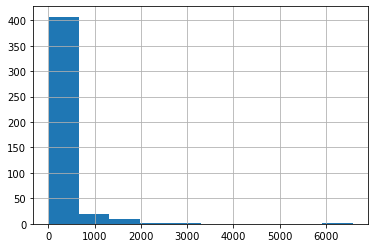

In [55]:
data12["nunique_customers"].hist()

In [56]:
data12.loc[(data12.nunique_customers <= 10)  , 'Score_customers'] = "5"
data12.loc[(data12.nunique_customers <= 50) & (data12.nunique_customers > 10) , 'Score_customers'] = "10"
data12.loc[ (data12.nunique_customers > 50) , 'Score_customers'] = "15"
data12

,Vendor Name,nunique_customers,Score_customers
0,Store 1,761,15
1,Store 10,1504,15
2,Store 100,266,15
3,Store 101,1364,15
4,Store 102,18,10
...,...,...,...
434,Store 95,15,10
435,Store 96,76,15
436,Store 97,2,5
437,Store 98,43,10


In [57]:
data12.to_excel(r'C:\Users\bahare\Desktop\snappshop\score2.xlsx', index = True, header=True)

In [61]:
data13 = data9[data9["Order Status"] == "Canceled"]
data13.head()

,Vendor Name,which month,Order Status,SuperTypeID,orders,nunique_customers,vendor_created,ave_active_per_week,basket_value,ave_discount_t,ave_discount_v,ave_voucher,ave_model,ave_items,sales_share,product variety,Rating,all order,rate
0,Store 1,month 1 - 3,Canceled,12,45,44,2020-11-17,5.0,257515.0,7152.0,333.0,0.0,2.0,3.0,2.0,777.0,4.0,523,9.0
2,Store 1,month 4 - 6,Canceled,12,13,13,2020-11-17,5.0,236411.0,8392.0,6219.0,0.0,2.0,4.0,1.0,777.0,4.0,286,5.0
4,Store 10,month 1 - 3,Canceled,12,132,125,2020-04-15,6.0,271126.0,3278.0,6556.0,0.0,3.0,3.0,2.0,1710.0,4.0,782,17.0
6,Store 10,month 4 - 6,Canceled,12,91,78,2020-04-15,6.0,211410.0,17066.0,34131.0,0.0,2.0,3.0,2.0,1710.0,4.0,839,11.0
8,Store 100,month 1 - 3,Canceled,12,11,11,2021-02-02,4.0,259118.0,4126.0,0.0,0.0,3.0,8.0,1.0,254.0,4.0,196,6.0


In [66]:
data13["cancelrate"] = ((data13["orders"] / data13["all order"])*100).round()
data13.head()

<ipython-input-66-4bfdd6b748f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data13["cancelrate"] = ((data13["orders"] / data13["all order"])*100).round()


,Vendor Name,which month,Order Status,SuperTypeID,orders,nunique_customers,vendor_created,ave_active_per_week,basket_value,ave_discount_t,...,ave_voucher,ave_model,ave_items,sales_share,product variety,Rating,all order,rate,cancel rate,cancelrate
0,Store 1,month 1 - 3,Canceled,12,45,44,2020-11-17,5.0,257515.0,7152.0,...,0.0,2.0,3.0,2.0,777.0,4.0,523,9.0,9.0,9.0
2,Store 1,month 4 - 6,Canceled,12,13,13,2020-11-17,5.0,236411.0,8392.0,...,0.0,2.0,4.0,1.0,777.0,4.0,286,5.0,5.0,5.0
4,Store 10,month 1 - 3,Canceled,12,132,125,2020-04-15,6.0,271126.0,3278.0,...,0.0,3.0,3.0,2.0,1710.0,4.0,782,17.0,17.0,17.0
6,Store 10,month 4 - 6,Canceled,12,91,78,2020-04-15,6.0,211410.0,17066.0,...,0.0,2.0,3.0,2.0,1710.0,4.0,839,11.0,11.0,11.0
8,Store 100,month 1 - 3,Canceled,12,11,11,2021-02-02,4.0,259118.0,4126.0,...,0.0,3.0,8.0,1.0,254.0,4.0,196,6.0,6.0,6.0


<AxesSubplot:>

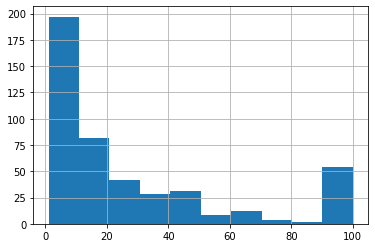

In [65]:
data13["cancel rate"].hist()

In [68]:
data13.loc[(data13.cancelrate <= 10)  , 'Score_cancely'] = "10"
data13.loc[ (data13.cancelrate > 10) , 'Score_cancely'] = "5"
data13

C:\Users\bahare\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\bahare\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\bahare\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

,Vendor Name,which month,Order Status,SuperTypeID,orders,nunique_customers,vendor_created,ave_active_per_week,basket_value,ave_discount_t,...,ave_items,sales_share,product variety,Rating,all order,rate,cancel rate,cancelrate,Score_customers,Score_cancely
0,Store 1,month 1 - 3,Canceled,12,45,44,2020-11-17,5.0,257515.0,7152.0,...,3.0,2.0,777.0,4.0,523,9.0,9.0,9.0,10,10
2,Store 1,month 4 - 6,Canceled,12,13,13,2020-11-17,5.0,236411.0,8392.0,...,4.0,1.0,777.0,4.0,286,5.0,5.0,5.0,10,10
4,Store 10,month 1 - 3,Canceled,12,132,125,2020-04-15,6.0,271126.0,3278.0,...,3.0,2.0,1710.0,4.0,782,17.0,17.0,17.0,5,5
6,Store 10,month 4 - 6,Canceled,12,91,78,2020-04-15,6.0,211410.0,17066.0,...,3.0,2.0,1710.0,4.0,839,11.0,11.0,11.0,5,5
8,Store 100,month 1 - 3,Canceled,12,11,11,2021-02-02,4.0,259118.0,4126.0,...,8.0,1.0,254.0,4.0,196,6.0,6.0,6.0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,Store 96,month 4 - 6,Canceled,12,10,10,2020-12-26,2.0,168654.0,4186.0,...,1.0,0.0,70.0,4.0,33,30.0,30.0,30.0,5,5
1016,Store 98,month 1 - 3,Canceled,13,1,1,2020-12-22,2.0,193200.0,20700.0,...,5.0,0.0,173.0,5.0,17,6.0,6.0,6.0,10,10
1018,Store 98,month 4 - 6,Canceled,13,2,2,2020-12-22,2.0,328700.0,14075.0,...,4.0,0.0,173.0,5.0,27,7.0,7.0,7.0,10,10
1020,Store 99,month 1 - 3,Canceled,12,2,2,2020-10-10,1.0,2000.0,0.0,...,1.0,0.0,1.0,4.0,8,25.0,25.0,25.0,5,5


In [69]:
data13.to_excel(r'C:\Users\bahare\Desktop\snappshop\score3.xlsx', index = True, header=True)

In [70]:
data9.head()

,Vendor Name,which month,Order Status,SuperTypeID,orders,nunique_customers,vendor_created,ave_active_per_week,basket_value,ave_discount_t,ave_discount_v,ave_voucher,ave_model,ave_items,sales_share,product variety,Rating,all order,rate
0,Store 1,month 1 - 3,Canceled,12,45,44,2020-11-17,5.0,257515.0,7152.0,333.0,0.0,2.0,3.0,2.0,777.0,4.0,523,9.0
1,Store 1,month 1 - 3,Successful,12,478,444,2020-11-17,5.0,232843.0,6763.0,855.0,11629.0,3.0,3.0,2.0,777.0,4.0,523,91.0
2,Store 1,month 4 - 6,Canceled,12,13,13,2020-11-17,5.0,236411.0,8392.0,6219.0,0.0,2.0,4.0,1.0,777.0,4.0,286,5.0
3,Store 1,month 4 - 6,Successful,12,273,260,2020-11-17,5.0,224660.0,5610.0,4651.0,6062.0,3.0,4.0,1.0,777.0,4.0,286,95.0
4,Store 10,month 1 - 3,Canceled,12,132,125,2020-04-15,6.0,271126.0,3278.0,6556.0,0.0,3.0,3.0,2.0,1710.0,4.0,782,17.0


In [72]:
data14 = data13.groupby(["Vendor Name","which month"]).agg({'orders':'sum'}).reset_index()
data14

,Vendor Name,which month,orders
0,Store 1,month 1 - 3,45
1,Store 1,month 4 - 6,13
2,Store 10,month 1 - 3,132
3,Store 10,month 4 - 6,91
4,Store 100,month 1 - 3,11
...,...,...,...
455,Store 96,month 4 - 6,10
456,Store 98,month 1 - 3,1
457,Store 98,month 4 - 6,2
458,Store 99,month 1 - 3,2


In [74]:
data15 = data14.set_index(['Vendor Name'])
data15

,which month,orders
Vendor Name,,
Store 1,month 1 - 3,45
Store 1,month 4 - 6,13
Store 10,month 1 - 3,132
Store 10,month 4 - 6,91
Store 100,month 1 - 3,11
...,...,...
Store 96,month 4 - 6,10
Store 98,month 1 - 3,1
Store 98,month 4 - 6,2


In [75]:
data15.to_excel(r'C:\Users\bahare\Desktop\snappshop\score4.xlsx', index = True, header=True)

In [84]:
data16 = pd.read_excel('test.xlsx',index_col=0)
data16.head()

,Vendor Name,which month,Order Status,SuperTypeID,orders,kaaa
0,Store 1,month 1 - 3,Canceled,12,45,0.000000
2,Store 1,month 4 - 6,Canceled,12,13,-71.111111
4,Store 10,month 1 - 3,Canceled,12,132,0.000000
6,Store 10,month 4 - 6,Canceled,12,91,-31.060606
8,Store 100,month 1 - 3,Canceled,12,11,0.000000


<AxesSubplot:>

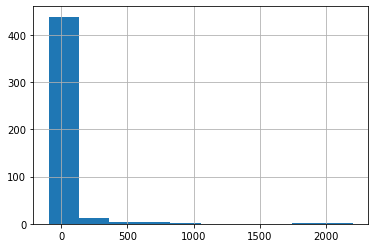

In [85]:
data16["kaaa"].hist()

In [86]:
data17 = data16.groupby(["Vendor Name"]).agg({'kaaa':'mean'}).reset_index()
data17

,Vendor Name,kaaa
0,Store 1,-35.555556
1,Store 10,-15.530303
2,Store 100,-27.272727
3,Store 101,-15.384615
4,Store 102,0.000000
...,...,...
328,Store 94,0.000000
329,Store 95,0.000000
330,Store 96,-8.333333
331,Store 98,50.000000


In [89]:
data17.loc[(data17.kaaa > 0)  , 'Scokaaae_gkaaaowth'] = "5"
data17.loc[(data17.kaaa == 0)  , 'Scokaaae_gkaaaowth'] = "10"
data17.loc[(data17.kaaa < 0)   , 'Scokaaae_gkaaaowth'] = "15"
data17.head()

,Vendor Name,kaaa,Scokaaae_gkaaaowth
0,Store 1,-35.555556,15
1,Store 10,-15.530303,15
2,Store 100,-27.272727,15
3,Store 101,-15.384615,15
4,Store 102,0.000000,10


In [90]:
data17.to_excel(r'C:\Users\bahare\Desktop\snappshop\score4.xlsx', index = True, header=True)

In [91]:
data9.head()

,Vendor Name,which month,Order Status,SuperTypeID,orders,nunique_customers,vendor_created,ave_active_per_week,basket_value,ave_discount_t,ave_discount_v,ave_voucher,ave_model,ave_items,sales_share,product variety,Rating,all order,rate
0,Store 1,month 1 - 3,Canceled,12,45,44,2020-11-17,5.0,257515.0,7152.0,333.0,0.0,2.0,3.0,2.0,777.0,4.0,523,9.0
1,Store 1,month 1 - 3,Successful,12,478,444,2020-11-17,5.0,232843.0,6763.0,855.0,11629.0,3.0,3.0,2.0,777.0,4.0,523,91.0
2,Store 1,month 4 - 6,Canceled,12,13,13,2020-11-17,5.0,236411.0,8392.0,6219.0,0.0,2.0,4.0,1.0,777.0,4.0,286,5.0
3,Store 1,month 4 - 6,Successful,12,273,260,2020-11-17,5.0,224660.0,5610.0,4651.0,6062.0,3.0,4.0,1.0,777.0,4.0,286,95.0
4,Store 10,month 1 - 3,Canceled,12,132,125,2020-04-15,6.0,271126.0,3278.0,6556.0,0.0,3.0,3.0,2.0,1710.0,4.0,782,17.0


In [92]:
data18 = data9.groupby(["Vendor Name"]).agg({'ave_active_per_week':'mean', 'basket_value':'mean','sales_share':'mean','product variety':'mean','Rating':'mean' })
data18

,ave_active_per_week,basket_value,sales_share,product variety,Rating
Vendor Name,,,,,
Store 1,5.0,237857.250000,1.5,777.0,4.0
Store 10,6.0,259127.500000,2.0,1710.0,4.0
Store 100,4.0,271489.750000,0.5,254.0,4.0
Store 101,6.0,298184.000000,2.0,157.0,5.0
Store 102,1.0,221647.333333,0.0,45.0,5.0
...,...,...,...,...,...
Store 95,2.0,77400.000000,0.0,4.0,5.0
Store 96,2.0,255613.000000,0.0,70.0,4.0
Store 97,1.0,2850.000000,0.0,6.0,4.0


In [96]:
data18["productvariety"] = data18["product variety"].copy()

In [97]:
data18.loc[(data18.ave_active_per_week >= 4)  , 'Score_ave_active_per_week'] = "4"
data18.loc[(data18.ave_active_per_week < 4)  , 'Score_ave_active_per_week'] = "0"

data18.loc[(data18.basket_value >= 250000)  , 'Score_basket_value'] = "4"
data18.loc[(data18.basket_value < 250000)  , 'Score_basket_value'] = "0"

data18.loc[(data18.sales_share > 0)  , 'Score_sales_share'] = "4"
data18.loc[(data18.sales_share <= 0)  , 'Score_sales_share'] = "0"

data18.loc[(data18.productvariety >= 150)  , 'Score_product_variety'] = "4"
data18.loc[(data18.productvariety < 150)  , 'Score_product_variety'] = "0"

data18.loc[(data18.Rating >= 4)  , 'Score_Rating'] = "4"
data18.loc[(data18.Rating < 4)  , 'Score_Rating'] = "0"

data18

,ave_active_per_week,basket_value,sales_share,product variety,Rating,productvariety,Score_ave_active_per_week,Score_basket_value,Score_sales_share,Score_product_variety,Score_Rating
Vendor Name,,,,,,,,,,,
Store 1,5.0,237857.250000,1.5,777.0,4.0,777.0,4,0,4,4,4
Store 10,6.0,259127.500000,2.0,1710.0,4.0,1710.0,4,4,4,4,4
Store 100,4.0,271489.750000,0.5,254.0,4.0,254.0,4,4,4,4,4
Store 101,6.0,298184.000000,2.0,157.0,5.0,157.0,4,4,4,4,4
Store 102,1.0,221647.333333,0.0,45.0,5.0,45.0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
Store 95,2.0,77400.000000,0.0,4.0,5.0,4.0,0,0,0,0,4
Store 96,2.0,255613.000000,0.0,70.0,4.0,70.0,0,4,0,0,4
Store 97,1.0,2850.000000,0.0,6.0,4.0,6.0,0,0,0,0,4


In [99]:
data9.to_excel(r'C:\Users\bahare\Desktop\snappshop\ready.xlsx', index = True, header=True)